In [1]:
import pandas as pd

In [2]:
x_train = pd.read_csv('news_set/train(originalwrong).csv').set_index('date')
x_valid = pd.read_csv('news_set/validate(originalwrong).csv').set_index('date')
x_test = pd.read_csv('news_set/test(originalwrong).csv').set_index('date')
x_train = x_train['title'].groupby(x_train.index).apply(list).apply(pd.Series).fillna('')
x_valid = x_valid['title'].groupby(x_valid.index).apply(list).apply(pd.Series).fillna('')
x_test = x_test['title'].groupby(x_test.index).apply(list).apply(pd.Series).fillna('')
label = pd.read_csv('price_set/train_label(original wrong).csv').set_index('Date')
#y_train = label['Close'].values

In [3]:
###################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@ label statistics
#lable data doesn't conclude prices in weekends, however, news conclude
label

,Close
Date,
2006-11-20,0.0
2006-11-21,1.0
2006-11-22,1.0
2006-11-24,0.0
2006-11-27,0.0
...,...
2012-06-21,0.0
2012-06-22,1.0
2012-06-25,0.0


In [4]:
categories = label['Close']
cates = label.groupby('Close')
print("total categories:", cates.ngroups)
print(cates.size())

total categories: 2
Close
0.0    643
1.0    768
dtype: int64


In [5]:
###########################################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [6]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
date,,,,,,,,,,,,,,,,,,,,,
2006-10-20,exxon mobil offers plan to end alaska dispute .,,,,,,,,,,...,,,,,,,,,,
2006-10-23,royal dutch bid for shell canada low sharehold...,dow ends at record high texas instruments off ...,shell looks to buy out canada unit for c xxx b...,ford is reviewing all products brands ceo .,at t earnings beat expectations .,ford won t sell ford credit .,,,,,...,,,,,,,,,,
2006-10-24,microsoft to start vista coupon plan for pc bu...,options scandal hits xxx companies us study .,u . s . tech stocks fall on texas instruments ...,ge wal mart shenzhen bank tie up on china cred...,lockheed martin ups forecast .,microsoft to defer xxx billion in sales to thi...,jim cramer bare escentuals allergan medicis av...,pepsico looks to new products acquisitions .,amazon profit beats expectations .,phelps dodge net doubles but off wall st . tar...,...,,,,,,,,,,
2006-10-25,boeing profit tops views but forecast disappoi...,u . s . stocks gain exxon and altria jump .,amazon profit beats forecasts .,honda q2 drops on finance losses yen lifts f c...,existing home sales fall for 6th straight month .,altria net hit by spain conwood lifts reynolds .,stocks seen up slightly after amazon results .,altria promises january details for kraft .,gm signals it is closer to labor deal with del...,gm posts profit but tough part of recovery loo...,...,,,,,,,,,,
2006-10-26,analysts sound note of caution on gm cash burn .,us airways reports loss after hedging .,comcast third quarter profit up on record subs...,microsoft profit rises 11 percent .,instant view 4 microsoft posts higher results .,dow chemical earnings rise on strong sales .,nissan us sales on track for oct double digit ...,us durable goods orders surge in september .,stocks gain on strong profits microsoft up late .,microsoft cfo says tender offer lowered outlook .,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-07-17,bank of america wins initial approval of 20 mi...,german budget committee won t give guidance on...,intel s sales forecast falls short of some ana...,volkswagen wins france with financing peugeot ...,morgan stanley german chief notheis steps down...,bank of america syncora settle mortgage fraud ...,mali preparing military action to take control...,german property sale said to draw blackstone m...,defense industry says budget cuts may cost 2 m...,gross says u . s . nearing recession as blackr...,...,,,,,,,,,,
2012-07-18,u . s . bancorp sells xxx billion of bonds aft...,abbott profit tops estimates as humira drug sa...,turkey yields sink third day to 10 month low o...,brazil said to plan tax rate cuts to lower ene...,visa europe should match mastercard fee cut al...,thai beverage to pay s xxx billion for ocbc s ...,bernanke says inflation to remain near fed s 2...,franken questions facebook on facial recogniti...,a netflix for magazines comes to ipad rich jar...,france will miss xxx offshore wind capacity ta...,...,,,,,,,,,,
2012-07-19,morgan stanley cuts pay pool for investment ba...,citigroup sees charge on smith barney valuation .,kazakhstan isn t planning to limit grain expor...,philly fed contracts home sales fall .,aig scorned by old republic for insuring homes...,kit digital shares fall to month low in prague...,textron earnings soar past wall street target .,amr ceo said to tell suitor he won t be rushed...,exxon mobil said to sell fuel oil shipment to ...,russian weather center predicts southern rain ...,...,,,,,,,,,,


In [7]:
x_train.shape, label.shape

((1994, 104), (1411, 1))

In [8]:
x_train_buffer = []
label_buffer = []
#batch_size = 32
#k = batch_size * 20
index = 0

def __iter__(self):
        return self

def reset():
    # self.source.seek(0)
    # self.label.seek(0)
    index = 0

def __next__():
    if end_of_data:
        end_of_data = False
        reset()
        raise StopIteration


In [9]:
assert len(x_train_buffer) == len(label_buffer), 'Buffer size mismatch!'

In [10]:
count = 0
for j, i in enumerate(label.index.values[index:]):
    count+=1
    #print(i) #20061020-20090507
    try:
        #print(x_train.loc[i].values)
        ss = list(filter(lambda x: len(x.split()) > 0, x_train.loc[i].values))
        ll = label.loc[i].values
    except KeyError as e:  # out of length
            print(i + ' ' + str(e))
            continue
            
    x_train_buffer.append(ss)
    label_buffer.append(int(ll))
if 'j' in locals():
    index += j + 1
#print(ss)
print(count) #index:index+k-->640 = 32 *20; index: 1428(2012-06-21)

2006-11-27 '2006-11-27'
2009-08-19 '2009-08-19'
2009-11-27 '2009-11-27'
1411


In [11]:
len(x_train_buffer),len(label_buffer)

(1408, 1408)

In [12]:
assert len(x_train_buffer) == len(label_buffer), 'Buffer size mismatch!'

In [13]:
import numpy

tlen = numpy.array([len(t) for t in x_train_buffer])  # len(t)-->每天的新闻条数
tidx = tlen.argsort() #返回索引值，数组值从小到大排列之后的索引值
tidx

array([ 885,  788,   23, ..., 1225, 1214, 1213])

In [14]:
len(tlen)

1408

In [15]:
import math
import random

batch_size = 32
tindex = []
##Todo shuffle
small_index = list(range(int(math.ceil(len(tidx) * 1. /batch_size)))) #len(tidx)=1425 / 32 = 44.53125    math.ceil(44.53125)=45
#math.ceil-->传回大于等于所给数字的最小整数，eg math.ceil(0.95)=1
#print(small_index)   - [0,1,...,44]
random.shuffle(small_index)
print(small_index)
# len(tidx)#1425

[15, 6, 38, 10, 37, 7, 22, 24, 13, 23, 25, 12, 35, 4, 21, 14, 9, 26, 29, 19, 39, 27, 17, 33, 0, 31, 20, 34, 8, 30, 2, 5, 3, 16, 36, 41, 28, 42, 18, 40, 43, 32, 1, 11]


In [16]:
#can only run once!!!有extend!!

for i in small_index:
    #print(i)
    if (i + 1) * batch_size > len(tidx):
        tindex.extend(tidx[i * batch_size:])
    else:
        tindex.extend(tidx[i * batch_size:(i + 1) * batch_size])
tidx = tindex
len(tidx)#1425

1408

In [17]:
_sbuf = [x_train_buffer[i] for i in tidx]
_lbuf = [label_buffer[i] for i in tidx]
x_train_buffer = _sbuf
label_buffer = _lbuf
##TODO delete useless
del _sbuf, _lbuf


In [18]:
temp = []
for i in (x_train_buffer):
    temp.append([j.strip().split() for j in i])  # split words and save to array
    
x_train_buffer = temp
##TODO delete useless
del temp

In [19]:
x_train_buffer[0]

[['lehman', 'up', 'after', 'morgan', 'stanley', 'overweight', 'rating', '.'],
 ['ge',
  'buys',
  '1bln',
  'of',
  'property',
  'loans',
  'from',
  'credit',
  'suisse',
  '.'],
 ['gm',
  'sales',
  'surprise',
  'lifts',
  'wall',
  'st',
  '.',
  'starbucks',
  'up',
  'late',
  '.'],
 ['aig', 'pays', 'sullivan', '47', 'million', 'severance', 'package', '.'],
 ['gm', 'stays', 'u', '.', 's', '.', 'market', 'leader', '.'],
 ['u', '.', 's', '.', 'auto', 'sales', 'hit', '15', 'year', 'low', '.'],
 ['starbucks',
  'to',
  'cut',
  'up',
  'to',
  'xxx',
  'jobs',
  'close',
  'xxx',
  'stores',
  '.'],
 ['dish',
  'says',
  'at',
  't',
  'to',
  'end',
  'partnership',
  'at',
  'year',
  'end',
  '.']]

In [20]:
import pickle as pkl

#vocabulary size:24759
#n_words = 24759 #7634 only train-->from vocab_cased_title.pickle'

#processing the vocab cases for title
#before dropping the words that occurs less than 5 times 23383
#Dict size 7283
#Done

with open('news_set/vocab_cased_title.pickle', 'rb') as f:
          dict = pkl.load(f)
        
#print(dict[])
word_index = max(list(dict.values()))
vocab_size = word_index+1
print('vocabulary size:{}'.format(vocab_size))  #vocabulary size:24759

vocabulary size:7634


In [21]:
########## 有pop(0),只能运行一次！！
sour = []
lab = []
sour_ori = []


try:
    while True:
        source_temp = []
        try:
            j = x_train_buffer.pop(0)  # 1 day before
            sour_ori.append(j)
        except IndexError:
            break
            
        for i in j:  # deal with 1 day before
            sss = [dict[w] if w in dict else 1 for w in i]  # 1 means _UNK_
            if vocab_size > 0:
                sss = [w if w < vocab_size else 1 for w in sss]  # 1 means _UNK_
            source_temp.append(sss)
        
        # read label
        ll1 = label_buffer.pop(0)
        sour.append(source_temp)
        lab.append(ll1)

except IOError:
    end_of_data = True

In [22]:
#sour[0],sour_ori[0]
changdu = []   #training set里所有新闻的长度 < 22
for jj in range(len(sour)):
    for kk in range(len(sour[jj])):
        changdu.append(len(sour[jj][kk]))

#changdu.index(max(changdu))
#len(changdu)  #42529  --> 46136减去了部分weekends的新闻
#max(changdu)  22

In [23]:
####################################################@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@  News numbers in one day  --> statistics
#maxlen_titles = 92  #--> 所有新闻条数中每天最多有92 个字
#maxlen_titles = 22 #--> 所有新闻条数中每天最多有92 条
counter = []
for i in range(len(sour)):
    counter.append(len(sour[i]))  #每天的新闻条数
print(counter)  
#len(counter) #1426个date
#maxlen__x = counter.index(max(counter))  index[432]maxsequence=104条
maxlen__x = max(counter)
maxlen__x  ##一天的新闻条数 -- 一天最多有104条

[8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 59, 59, 59, 59, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 61, 62, 62, 62, 62, 62, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 58, 58, 58, 58, 58, 58, 58, 58, 58, 59, 59, 59, 59, 59, 59, 59, 59, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 12, 12,

104

In [24]:
pd.Series(counter).describe()

count    1408.000000
mean       24.431108
std        24.132207
min         1.000000
25%         7.000000
50%        11.500000
75%        46.000000
max       104.000000
dtype: float64

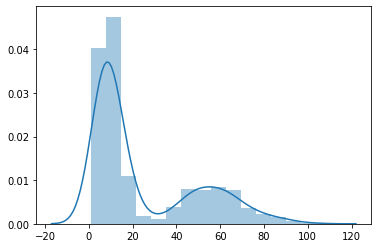

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(counter)#, bins=10)
plt.show()

In [59]:
#